### Exemplo de utilização dos scripts para modelagem de sistemas de radio frequência

In [1]:
# Instala a biblioteca com os scripts

%pip install -e .

Obtaining file:///home/adrissonsamersla/Workspace/ita/asa-rf
  Preparing metadata (setup.py) ... done
  Attempting uninstall: asa-rf
    Found existing installation: asa-rf 0.0.1
    Uninstalling asa-rf-0.0.1:
      Successfully uninstalled asa-rf-0.0.1
  Running setup.py develop for asa-rf
Note: you may need to restart the kernel to use updated packages.


In [2]:
from math import radians

from rf.radar.component import Radar, Target

# Parâmetro do alvo
target = Target(
    rcs = 2                                  # [m^2] => 2 m^2
)

# Parâmetros do radar
radar = Radar(
    peak_power=40000,                        # [W]     => 40 KW
    antenna_gain=34,                         # [dB]    => 34 dB
    frequency= 1.3e9,                        # [Hz]    => 1300 MHz
    noise_figure=3,                          # [dB]    => 3 dB
    band_width=1.0e6,                        # [Hz]    => 1.00 MHz
    pulse_width=200e-6,                      # [s]     => 200 usec
    pulse_repetition=375,                    # [Hz]    => 375 Hz
    beam_width=radians(1.3),                 # [rad]   => 1.3 degrees
    angular_velocity=radians(6.0 * 360)/60.0 # [rad/s] => 6 rpm
)

# Parâmetros adicionais
losses = 15                                  # 15 dB

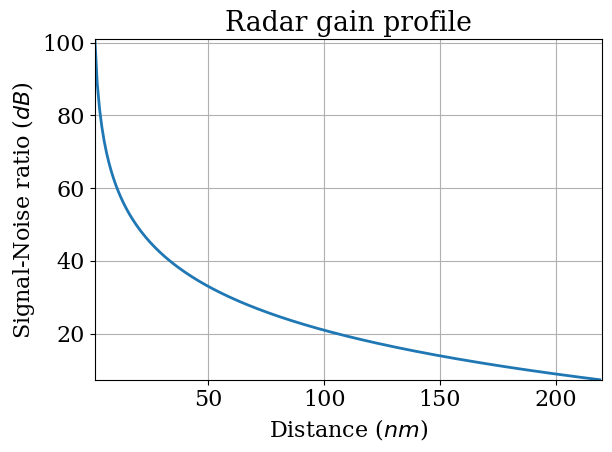

In [3]:
from rf.radar.chart import plot_snrs

figure, _ = plot_snrs(
    1.0, 220.0, 1.0,
    radar,
    target,
    losses,
)

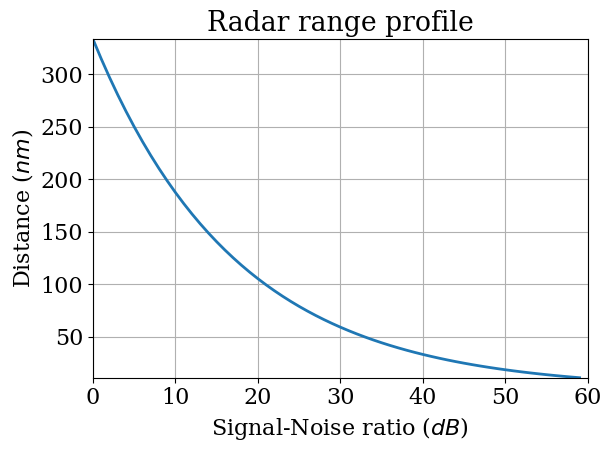

In [4]:
from rf.radar.chart import plot_ranges

figure, _ = plot_ranges(
    0.0, 60.0, 1.0,
    radar,
    target,
    losses,
)

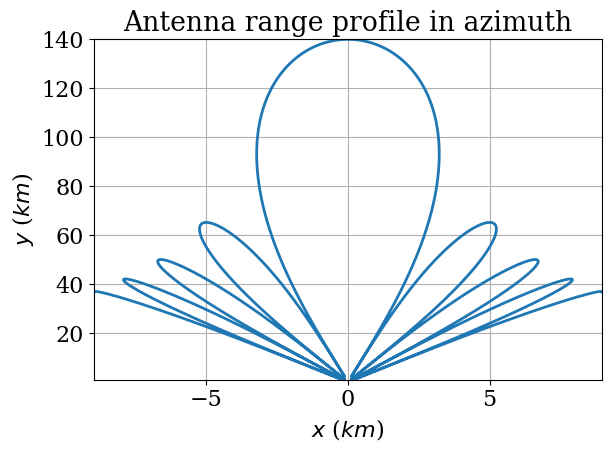

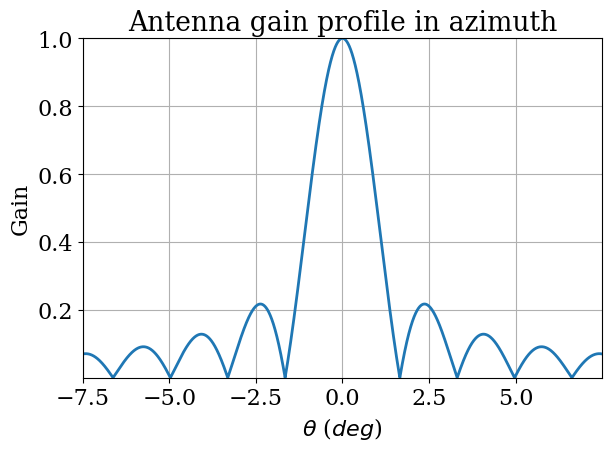

In [5]:
from rf.antenna.chart import plot_azimuth_gains

_, _ = plot_azimuth_gains(
    max_range=140.0,
    beam_width=2.0,
)

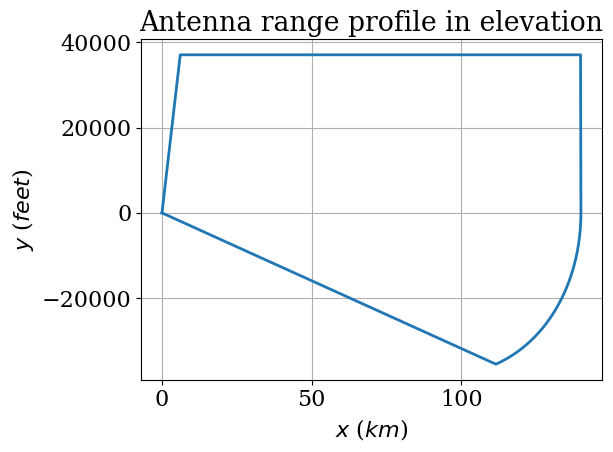

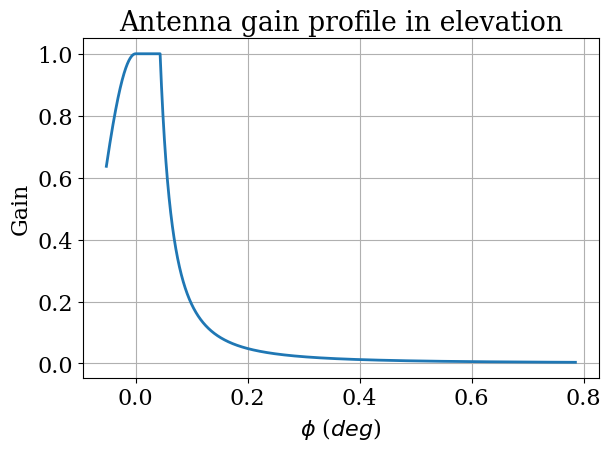

In [6]:
from rf.antenna.chart import plot_elevation_gains

_, _ = plot_elevation_gains(
    max_range=140.0,
    max_elev=45,
    min_elev=-0.5,
    tgt_ang=2.5,
    factor=30.0
)